# Desafio - Vaga para Cientista de Dados

**Empresa**: Lambda3 (https://www.lambda3.com.br/)

**Complexidade**: Intermediário

**Tarefa avaliada**: Machine Learning - Classificação

**Requisitos**: 
- Ferramentas Essenciais.
- Conceitos e Aplicações.
- Dominando o Python
- Python para Análise de Dados.
- Machine Learning
    - Algoritmos de Classificação
    - Técnicas de Validação
    - Tunning de Modelos

**Objetivo**: Este desafio tem como objetivo avaliar as habilidades do candidato em relação a uma tarefa simples de classificação, conforme descrito pela empresa. 
Todas as etapas do desafio podem ser resolvidos com os conhecimentos adquiridos no capítulo de Machine Learning.

**Recursos**: Para este desafio é proposto o dataset Iris e poder ser visualizado [aqui](https://archive.ics.uci.edu/ml/datasets/Iris).

**Importando as bibliotecas necessárias**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB

<p><span style="color:red">O dataset deve ser o Iris.</span></p>

**Importando o dataset Iris.**

In [2]:
iris = load_iris()

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Verificando os dados e atributos da base de dados.**

In [5]:
iris.target_names # 0 setosa 1 versicolor 2 virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.frame

In [8]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['class']=iris.target
iris_df
iris=iris_df.copy()
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<p><span style="color:red"> Receber as entradas específicas (escolher as variáveis pertinentes).</span></p>
<p><span style="color:red"> Justificar a escolha das variáveis.</span></p>


**Separando separando os atributos que serão utilizados como features e a classe.**

In [10]:
X = iris.drop("class",axis=1)

In [11]:
y = iris["class"]

**Verificando as formas das variáveis.**

In [12]:
X.shape

(150, 4)

In [13]:
y.shape

(150,)

<IPython.core.display.Javascript object>


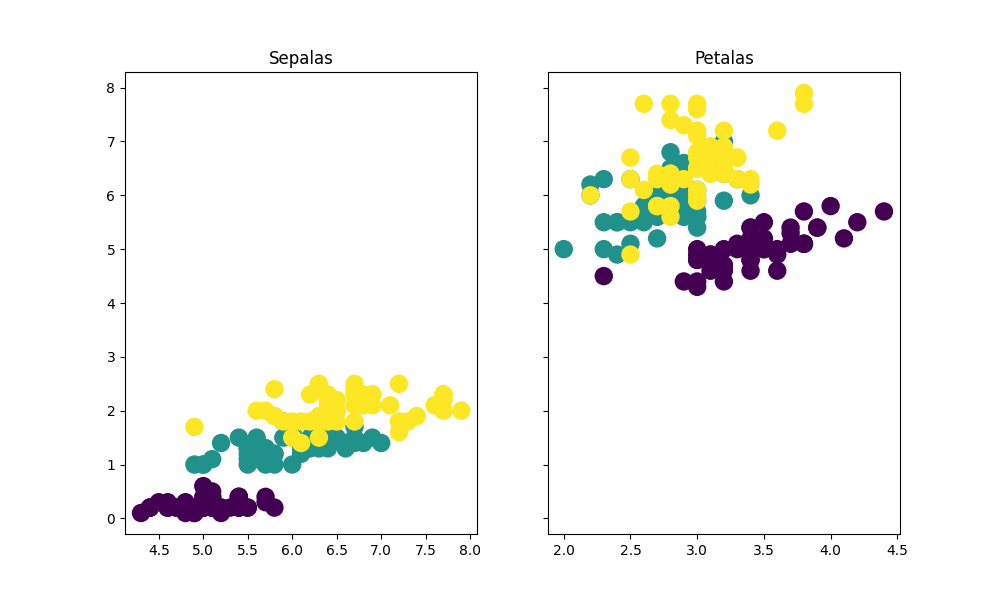

In [14]:
# visualizando
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
# sharey controla o compartilhamento de propriedades entre os eixos x ( sharex) ou y ( sharey)
# True ou 'all': o eixo x ou y será compartilhado entre todas as subparcelas
ax1.set_title('Sepalas')
ax1.scatter(X['sepal length (cm)'], X['petal width (cm)'],s=150,c=y)
ax2.set_title('Petalas')
ax2.scatter(X['sepal width (cm)'], X['sepal length (cm)'],s=150,c=y);

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [16]:
# criando pipelines

pip_ss_knn = Pipeline([('scaler', StandardScaler()),
                    ('KNN', KNeighborsClassifier())
                   ])

pip_minmax_knn = Pipeline([('minmax', MinMaxScaler()),
                       ('KNN', KNeighborsClassifier())
                      ])
pip_knn=Pipeline([('KNN', KNeighborsClassifier())
                      ])



pip_ss_svm = Pipeline([('scaler', StandardScaler()),
                       ('SVM', svm.SVC())
                      ])
pip_minmax_svm = Pipeline([('minmax', MinMaxScaler()),
                       ('SVM', svm.SVC())
                      ])
pip_svm=Pipeline([('SVM', KNeighborsClassifier())
                      ])



pip_ss_random = Pipeline([('scaler', StandardScaler()),
                       ('Random', RandomForestClassifier())
                      ])
pip_minmax_random = Pipeline([('minmax', MinMaxScaler()),
                       ('Random', RandomForestClassifier())
                      ])
pip_random=Pipeline([('Random', RandomForestClassifier())
                      ])



pip_ss_tree = Pipeline([('scaler', StandardScaler()),
                       ('Tree', DecisionTreeClassifier())
                      ])
pip_minmax_tree= Pipeline([('minmax', MinMaxScaler()),
                       ('Tree', DecisionTreeClassifier())
                      ])
pip_tree=Pipeline([('Tree', DecisionTreeClassifier())
                      ])

# não funciona bem com os piplines, mas está aqui para visualizarmos
pip_ss_kmeans = Pipeline([('scaler', StandardScaler()),
                       ('KMeans', KMeans())
                      ])
pip_minmax_kmeans= Pipeline([('minmax', MinMaxScaler()),
                       ('KMeans', KMeans())
                      ])
pip_kmeans=Pipeline([('KMeans', KMeans())
                      ])


# 'pip_ss_nb' não é criado por o NB não aceitar valores negativos
pip_minmax_nb= Pipeline([('minmax', MinMaxScaler()),
                       ('Naive', MultinomialNB())
                      ])
pip_nb=Pipeline([('Naive', MultinomialNB())
                      ])

In [17]:
pip_ss_knn.fit(X_train, y_train)

pip_minmax_knn.fit(X_train, y_train)

pip_knn.fit(X_train, y_train)



pip_ss_svm.fit(X_train, y_train)

pip_minmax_svm.fit(X_train, y_train)

pip_svm.fit(X_train, y_train)


pip_ss_random.fit(X_train, y_train)

pip_minmax_random.fit(X_train, y_train)

pip_random.fit(X_train, y_train)



pip_ss_tree.fit(X_train, y_train)

pip_minmax_tree.fit(X_train, y_train)

pip_tree.fit(X_train, y_train)



pip_ss_kmeans.fit(X_train, y_train)

pip_minmax_kmeans.fit(X_train, y_train)

pip_kmeans.fit(X_train, y_train)



pip_minmax_nb.fit(X_train, y_train)

pip_nb.fit(X_train, y_train)

Pipeline(steps=[('Naive', MultinomialNB())])

In [18]:
pip_ss_knn.score(X_test, y_test),pip_ss_knn.score(X_train, y_train)

(0.9666666666666667, 0.9583333333333334)

In [19]:
pip_minmax_knn.score(X_test, y_test),pip_minmax_knn.score(X_train, y_train)

(1.0, 0.95)

In [20]:
pip_knn.score(X_test, y_test),pip_knn.score(X_train, y_train)

(0.9666666666666667, 0.975)

In [21]:
pip_ss_svm.score(X_test, y_test),pip_ss_svm.score(X_train, y_train)

(0.9666666666666667, 0.975)

In [22]:
pip_minmax_svm.score(X_test, y_test),pip_minmax_svm.score(X_train, y_train)

(0.9666666666666667, 0.975)

In [23]:
pip_svm.score(X_test, y_test),pip_svm.score(X_train, y_train)

(0.9666666666666667, 0.975)

In [24]:
pip_ss_random.score(X_test, y_test),pip_ss_random.score(X_train, y_train)

(0.9333333333333333, 1.0)

In [25]:
pip_minmax_random.score(X_test, y_test),pip_minmax_random.score(X_train, y_train)

(0.9666666666666667, 1.0)

In [26]:
pip_random.score(X_test, y_test),pip_random.score(X_train, y_train)

(0.9333333333333333, 1.0)

In [27]:
pip_ss_tree.score(X_test, y_test),pip_ss_tree.score(X_train, y_train)

(0.9666666666666667, 1.0)

In [28]:
pip_minmax_tree.score(X_test, y_test),pip_minmax_tree.score(X_train, y_train)

(0.9666666666666667, 1.0)

In [29]:
pip_tree.score(X_test, y_test),pip_tree.score(X_train, y_train)

(0.9333333333333333, 1.0)

In [30]:
pip_ss_kmeans.score(X_test, y_test),pip_ss_kmeans.score(X_train, y_train)

(-16.359120694307947, -47.21546672666728)

In [31]:
pip_minmax_kmeans.score(X_test, y_test),pip_minmax_kmeans.score(X_train, y_train)

(-0.7728655540372925, -2.47223525619393)

In [32]:
pip_kmeans.score(X_test, y_test),pip_kmeans.score(X_train, y_train)

(-7.2318891746449285, -23.404577989090367)

In [33]:
pip_minmax_nb.score(X_test, y_test),pip_minmax_nb.score(X_train, y_train)

(0.8333333333333334, 0.7833333333333333)

In [34]:
pip_nb.score(X_test, y_test),pip_nb.score(X_train, y_train)

(0.9666666666666667, 0.95)

<p><span style="color:red"> Explicar o porque escolheu o algoritmo de classificação usado (e porque não usou outros).</span></p>

O algoritmo **K Nearest Neighbors (KNN)** foi escolhido por sua simplicidade, rápida execução e por se tratar de uma base de dados pequena com poucos dados e atributos.
<br>
Pensando na estratégia de resolver o problema proposto da melhor maneira e da forma mais simples possível, o algoritmo escolhido neste cenário apresentou bons resultados, sem a necessidade de tunning e ajustes.

**Instanciando o algoritmo KNN.**

In [35]:
clf_knn = KNeighborsClassifier()

**Treinando o modelo utilizando a validação utilizando Cross Validation e armazenando os resultados.**

In [36]:
resultados_knn = cross_val_predict(clf_knn, X, y, cv=5)

**Verificando os resultados através de métricas.**

Se tivesse sido alterado o nome poderia ser retornado com:

`nomes_classes = label.inverse_transform([0,1,2])`

In [37]:
nome_classes = iris['class'].map({0: 'Setosa', 1:'Versicolor',2: 'Virginica'})

In [38]:
print(classification_report(y,resultados_knn,target_names=nome_classes.unique()))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       0.98      0.94      0.96        50
   Virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



**Tuning**

In [39]:
# n_neighbors - número de vizinhos
lista_k=[1,2,3,4,5,6,7,8,9,10]
# p - parâmetro para minkowski (l1,l2,l_p)
lista_p=[1,2,3]

In [40]:
parametros_grid_knn = dict(n_neighbors=lista_k,p=lista_p)

In [41]:
parametros_grid_knn

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3]}

In [42]:
grid_knn=GridSearchCV(clf_knn , parametros_grid_knn, cv=10, scoring='accuracy')

In [43]:
grid_knn.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3]},
             scoring='accuracy')

In [44]:
grid_knn.cv_results_

{'mean_fit_time': array([0.00359397, 0.0029036 , 0.00290809, 0.00287044, 0.00295279,
        0.00287745, 0.00288353, 0.00286891, 0.00288372, 0.00287178,
        0.00289569, 0.00290914, 0.00286086, 0.00379205, 0.00293944,
        0.0029707 , 0.00284994, 0.00289469, 0.00286322, 0.00287941,
        0.00291021, 0.00289142, 0.00285916, 0.00286937, 0.00287623,
        0.00290971, 0.00288484, 0.00286865, 0.00297558, 0.00307033]),
 'std_fit_time': array([1.15707800e-03, 6.18750371e-05, 6.73334084e-05, 2.87883400e-05,
        1.24210838e-04, 3.33120244e-05, 8.42895294e-05, 3.93304599e-05,
        1.92156500e-05, 5.18426878e-05, 4.73828600e-05, 1.33229266e-04,
        2.08121940e-05, 1.10015582e-03, 7.66817645e-05, 1.43262072e-04,
        2.03786528e-05, 3.47306072e-05, 2.95257707e-05, 5.54809255e-05,
        6.69728823e-05, 9.56795621e-05, 2.75886046e-05, 1.66377908e-05,
        2.32984607e-05, 6.23087514e-05, 3.57167345e-05, 1.65703485e-05,
        3.60065959e-04, 3.50496338e-04]),
 'mean_scor

In [45]:
grid_knn.best_params_

{'n_neighbors': 6, 'p': 3}

In [46]:
grid_knn.best_score_

0.9800000000000001

**Standard Scaler**

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(X)

StandardScaler()

In [49]:
scaled=scaler.transform(X)
scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [50]:
clf_knn2 = KNeighborsClassifier()

In [51]:
resultados_knn = cross_val_predict(clf_knn2, scaled, y, cv=5)

In [52]:
nome_classes = iris['class'].map({0: 'Setosa', 1:'Versicolor',2: 'Virginica'})

In [53]:
print(classification_report(y,resultados_knn,target_names=nome_classes.unique()))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       0.94      0.94      0.94        50
   Virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



**Tuning com dados escalados**

In [54]:
parametros_grid_knn

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3]}

In [55]:
grid_knn2=GridSearchCV(clf_knn2 , parametros_grid_knn, cv=10, scoring='accuracy')

In [56]:
grid_knn2.fit(scaled,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3]},
             scoring='accuracy')

In [57]:
grid_knn2.cv_results_

{'mean_fit_time': array([0.0017344 , 0.00084829, 0.0008656 , 0.00085418, 0.00086563,
        0.00086124, 0.0009208 , 0.00087049, 0.00086126, 0.00090539,
        0.00084941, 0.00086825, 0.00084951, 0.00087273, 0.00086536,
        0.00084763, 0.00084763, 0.00129478, 0.00090895, 0.00087438,
        0.00087702, 0.000875  , 0.0008548 , 0.00087571, 0.00093715,
        0.00094118, 0.00087159, 0.00086176, 0.00086324, 0.00086529]),
 'std_fit_time': array([1.16998233e-03, 1.12289836e-05, 1.06779588e-05, 1.11655521e-05,
        1.64159632e-05, 1.24536000e-05, 1.71899381e-04, 2.87328417e-05,
        9.29844685e-06, 1.07238241e-04, 5.82058812e-06, 3.47568253e-05,
        8.36944303e-06, 6.50259084e-05, 1.65099314e-05, 1.11577857e-05,
        8.70981935e-06, 3.35459669e-04, 4.67198468e-05, 1.48637110e-05,
        2.13304696e-05, 2.40259218e-05, 1.63322992e-05, 2.33002173e-05,
        2.14047230e-04, 9.13086010e-05, 1.42190450e-05, 2.06229315e-05,
        2.33292427e-05, 1.33863274e-05]),
 'mean_scor

In [58]:
grid_knn2.best_params_

{'n_neighbors': 8, 'p': 2}

In [59]:
grid_knn2.best_score_

0.9666666666666668

**Naive Bayes**

In [60]:
naive=MultinomialNB()

In [61]:
resultados_naive = cross_val_predict(naive,X, y, cv=5)

In [62]:
nome_classes = iris['class'].map({0: 'Setosa', 1:'Versicolor',2: 'Virginica'})

In [63]:
print(classification_report(y,resultados_naive,target_names=nome_classes.unique()))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       0.94      0.92      0.93        50
   Virginica       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [64]:
# alpha
lista_alpha=list(range(1,11))

In [65]:
parametros_grid_naive = dict(alpha=lista_alpha)

In [66]:
parametros_grid_naive

{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [67]:
grid_naive=GridSearchCV(naive, parametros_grid_naive, cv=10, scoring='accuracy')

In [68]:
grid_naive.fit(X,y)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [69]:
grid_naive.cv_results_

{'mean_fit_time': array([0.00496757, 0.00311582, 0.00308833, 0.0031379 , 0.00319037,
        0.00309956, 0.00307393, 0.00308442, 0.00310302, 0.00310102]),
 'std_fit_time': array([3.61189350e-03, 5.20554687e-05, 3.32138902e-05, 1.54482952e-04,
        2.41638640e-04, 5.23498199e-05, 1.18515859e-05, 1.26447289e-05,
        3.09485316e-05, 1.53072155e-05]),
 'mean_score_time': array([0.00272315, 0.00181527, 0.00180924, 0.00181131, 0.00194037,
        0.00185528, 0.00182104, 0.00181022, 0.00189977, 0.00183225]),
 'std_score_time': array([1.78823912e-03, 1.31046962e-05, 1.73096650e-05, 1.71123430e-05,
        3.73254032e-04, 9.48013072e-05, 3.17014239e-05, 1.16093936e-05,
        1.48580186e-04, 1.38816134e-05]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha'

In [70]:
grid_naive.best_params_

{'alpha': 6}

In [71]:
grid_naive.best_score_

0.9666666666666668

**KNN com {'n_neighbors': 6, 'p': 3}**

In [72]:
display(X_train.head(3)),display(X_test.head(3))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
17,5.1,3.5,1.4,0.3
81,5.5,2.4,3.7,1.0
103,6.3,2.9,5.6,1.8


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
40,5.0,3.5,1.3,0.3
146,6.3,2.5,5.0,1.9
38,4.4,3.0,1.3,0.2


(None, None)

In [73]:
display(y_train.head(3)),display(y_test.head(3))

17     0
81     1
103    2
Name: class, dtype: int64

40     0
146    2
38     0
Name: class, dtype: int64

(None, None)

In [74]:
knn_final=KNeighborsClassifier(n_neighbors=6, p=3)

In [75]:
knn_final.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6, p=3)

In [76]:
y_pred=knn_final.predict(X_test)

In [77]:
# acuracia
accuracy_score(y_test,y_pred)

1.0

In [78]:
# relatorio
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [79]:
y_pred2=knn_final.predict(X_train)

In [80]:
# acuracia
accuracy_score(y_train,y_pred2)

0.9833333333333333

In [81]:
# relatorio
print (classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      0.98      0.98        41
           2       0.98      0.98      0.98        41

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



<p><span style="color:red"> Apresentar a saída classificada</span></p>
<p><span style="color:red"> Justificar a performance do modelo de classificação, com base nos métodos de avaliação pertinentes.</span></p>


O Modelo de Classificação apresentou bons resultados utilizando a técnica de Validação Cruzada com um total de 5 folds.
<br><br>
Foram escolhidas as métricas **precision**, **recall** e **f1-score** para avaliar o modelo por permitir uma análise por classe, já que estamos lidando com um problema que contém 3 classes.
    
Através do valor da métrica de precisão (precision) podemos ver que o modelo sofreu mais para classificar a classe **Iris-Virginica** obtendo um percentual de **94%** que corresponde ao número de vezes que o modelo classificou corretamente os dados da respectiva classe sobre a quantidade de vezes que a classe foi predita.

Analisando a métrica de revocação (recall) o modelo teve mais dificuldade para classificar os dados da classe Iris-versicolor também com o percentual de **94%** que corresponde ao número de vezes que o modelo classificou corretamente diante do volume de dados da respectiva classe no dataset.

Por fim, a medida **F1-Score** que corresponde a média harmonica entre as duas medidas anteriormente citadas apresentou um bom resultado com o valor de **97%**.

### Trabalho adicional

### Dicas importantes 

- Tenha coragem.
- Seja verdadeiro e honesto.
- Priorize sempre a simplicidade.
- Exponha o seu ponto de vista sem medo.
- Dê o seu máximo!